# Temporal Process Mining

## Definition

Process mining algorithms find a suitable process model that describes the order of events or activities that are observed during a process execution.

In [24]:
namespace, type = "default", "Foo"

This notebook mines the workflow execution in namespace `namespace` of workflow type `type`

In [29]:
# python std
import datetime
# google grpc
import grpc
# pandas
import pandas
# temporal
from temporal.api.common.v1.message_pb2 import *
from temporal.api.enums.v1.event_type_pb2 import *
from temporal.api.workflowservice.v1.request_response_pb2 import *
from temporal.api.workflowservice.v1.service_pb2_grpc import *

wfss = WorkflowServiceStub(grpc.insecure_channel('host.docker.internal:7233'))

logs = []

for wfe in wfss.ScanWorkflowExecutions(ScanWorkflowExecutionsRequest(namespace=namespace, query=f"WorkflowType='{type}'")).executions:
    dtl = wfss.GetWorkflowExecutionHistory(GetWorkflowExecutionHistoryRequest(namespace=namespace, execution=WorkflowExecution(workflow_id=wfe.execution.workflow_id, run_id=wfe.execution.run_id)))
    for evt in dtl.history.events:
        if evt.event_type == EVENT_TYPE_ACTIVITY_TASK_SCHEDULED:
            logs.append([wfe.execution.run_id, evt.activity_task_scheduled_event_attributes.activity_type.name, datetime.datetime.fromtimestamp(evt.event_time.seconds)])
        
logs = pandas.DataFrame(logs, columns = ["case:concept:name", "concept:name", "time:timestamp"])

In [28]:
logs

,case:concept:name,concept:name,time:timestamp
0,e8fa59ca-22e2-4bff-91c1-5fe5bb042414,Bar,2021-11-02 19:26:15
1,e8fa59ca-22e2-4bff-91c1-5fe5bb042414,Bar,2021-11-02 19:26:17



# Process Mining

From the website:

Designed to be used in both academia and industry, PM4Py is the leading open source process mining platform written in Python.

In [ ]:
import sys
!{sys.executable} -m pip install pm4py

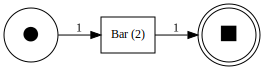

In [12]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer

logs = log_converter.apply(logs)

net, initial_marking, final_marking = alpha_miner.apply(logs)

pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=log_converter.apply(logs))